In [1]:
import pandas as pd 
import pickle

In [2]:
loaded_model = pickle.load(open('data_3_model_2','rb'))

In [3]:
df = pd.read_csv('df_short_test.csv')

In [4]:
df.columns

Index(['Prop Type', 'S/A', 'Price', 'Yr Blt', 'TypeDwel', '# of Kitchens',
       '# Rms', 'Age', 'Floor Area -Grand Total', 'Area', 'Type',
       'Total Bedrooms', 'Total Baths', 'Days On Market', 'List Date',
       'Lot Sz (Sq.Ft.)', 'View', 'Fireplaces', 'Parking Places - Total',
       'No. Floor Levels', 'Dist to School/School Bus changed',
       'Distance to Pub/Rapid Tr changed', 'Zoning changed',
       'Realtor remarks sentiment classified',
       'Public remarks sentiment classified'],
      dtype='object')

In [5]:
df.iloc[0]

Prop Type                               Residential Detached
S/A                                           Burke Mountain
Price                                                1650000
Yr Blt                                                 202.0
TypeDwel                                               HOUSE
# of Kitchens                                            2.0
# Rms                                                   10.0
Age                                                   1818.0
Floor Area -Grand Total                               3916.0
Area                                               Coquitlam
Type                                     House/Single Family
Total Bedrooms                                           4.0
Total Baths                                              4.0
Days On Market                                             0
List Date                                             737521
Lot Sz (Sq.Ft.)                                          0.0
View                    

In [6]:
from sklearn.model_selection import train_test_split
y = df.Price
X = df.drop(['Price'], axis=1)

In [7]:
from sklearn.metrics import mean_absolute_error,r2_score,median_absolute_error
y_pred_pickle = loaded_model.predict(X)
median_absolute_error(y, y_pred_pickle)

C:\Users\jesse\AppData\Roaming\Python\Python38\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


51686.25

In [8]:
r2_score(y,y_pred_pickle)

0.8573321434356702

(array([   6.,   18.,   84.,  778., 3499.,  863.,  128.,   43.,   11.,
           8.]),
 array([-77.15081452, -59.90045948, -42.65010444, -25.39974941,
         -8.14939437,   9.10096067,  26.3513157 ,  43.60167074,
         60.85202578,  78.10238081,  95.35273585]),
 <BarContainer object of 10 artists>)

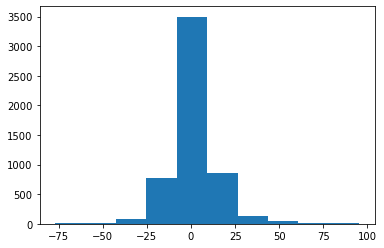

In [9]:
import matplotlib.pyplot as plt 
comparison = y.to_frame()
comparison['Prediction'] = y_pred_pickle.tolist()
comparison['error_percentage'] = (comparison.Prediction - comparison.Price)/comparison.Price * 100
plt.hist(comparison[comparison['error_percentage']<100]['error_percentage'])

In [10]:
comparison['error_percentage'].abs().mean()

9.202134315442368

In [11]:
df.Price.mean()

1212508.7635296276